<a href="https://colab.research.google.com/github/ncbx666/UniversityRep/blob/main/rnn_sinuses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рекуррентные нейронные сети


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [106]:
b = 2*np.pi
x = np.linspace(0, b, 1000)
y_true = np.sin(x)

error = np.random.normal(0, 0.05, size=x.shape)
y_with_error = y_true + error

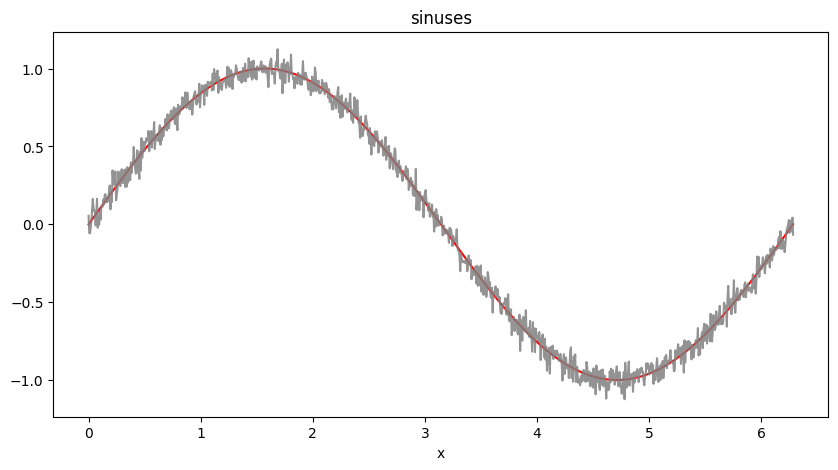

In [107]:
plt.figure(figsize=(10,5))
plt.title('sinuses')
plt.xlabel('x')
plt.plot(x, y_true, color='red', label='sin(x)')
plt.plot(x, y_with_error, color = 'gray', alpha=0.85, label='sin(x) with error')

In [108]:
def create_group(x, n):
  return [x[i:i + n] for i in range(len(x) - n)]


In [109]:
class CustomDataset(Dataset):
    def __init__(self, x, y, n):
        self.x = torch.tensor(create_group(x, n), dtype=torch.float32)
        self.y = torch.tensor(y[n:], dtype=torch.float32)  # y соответствует y для каждого n-группового отрезка

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [110]:
n = 8

#сделать так, чтобы нам подавалась лишь часть синуса. то есть не весь период, а только какая то его часть, потому что иначе модель переообучается, запоминаю полностью значение синуса.
dataset = CustomDataset(x[:800], y_with_error[:800], n)

test_dataset = CustomDataset(x, y_with_error, n)

dataloader = DataLoader(dataset, batch_size = 64, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size = 64, shuffle=False)

In [111]:
NUM_EPOCH = 100
NUM_OUT = 1
LEARING_RATE = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [112]:
class predictor(nn.Module):
    def __init__(self, n):  # n - размер входного сегмента
        super().__init__()
        self.fc1 = nn.Linear(n, 64)  # Увеличиваем количество нейронов
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


In [113]:
def train_model(model, dataloader, device=device, num_epoch=NUM_EPOCH, lr_rate=LEARING_RATE):
    model = model.to(device)

    loss_function = nn.MSELoss()
    opt = optim.Adam(model.parameters(), lr=lr_rate)
    #scheduler = optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)

    loss_history = []
    for epoch in range(num_epoch):
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            opt.zero_grad()
            predicted_numbers = model(x_batch)
            loss = loss_function(predicted_numbers, y_batch.view(-1, 1))

            loss.backward()
            opt.step()

        loss_history.append(loss.item())

        # Обновляем learning rate
        #scheduler.step()

        # Печать текущего learning rate
        current_lr = opt.param_groups[0]['lr']
        print(f"Epoch {epoch + 1}/{num_epoch}, Loss: {loss.item():.4f}, LR: {current_lr}")

    return model, loss_history


In [114]:
def train_model_rnn(model, dataloader, device=device, num_epoch=NUM_EPOCH, lr_rate=LEARING_RATE*2):
    model = model.to(device)

    loss_function = nn.MSELoss()
    opt = optim.Adam(model.parameters(), lr=lr_rate)

    loss_history = []
    for epoch in range(num_epoch):
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Добавляем размерность для RNN
            x_batch = x_batch.unsqueeze(-1)

            opt.zero_grad()
            predicted_numbers = model(x_batch)
            loss = loss_function(predicted_numbers, y_batch.view(-1, 1))

            loss.backward()
            opt.step()

        loss_history.append(loss.item())

        # Печать текущего learning rate
        current_lr = opt.param_groups[0]['lr']
        print(f"Epoch {epoch + 1}/{num_epoch}, Loss: {loss.item():.4f}, LR: {current_lr}")

    return model, loss_history


In [115]:
model = predictor(n)


In [116]:
model, loss = train_model(model, dataloader)

Epoch 1/100, Loss: 0.3436, LR: 0.001
Epoch 2/100, Loss: 0.2483, LR: 0.001
Epoch 3/100, Loss: 0.1404, LR: 0.001
Epoch 4/100, Loss: 0.0711, LR: 0.001
Epoch 5/100, Loss: 0.0590, LR: 0.001
Epoch 6/100, Loss: 0.0337, LR: 0.001
Epoch 7/100, Loss: 0.0478, LR: 0.001
Epoch 8/100, Loss: 0.0236, LR: 0.001
Epoch 9/100, Loss: 0.0177, LR: 0.001
Epoch 10/100, Loss: 0.0133, LR: 0.001
Epoch 11/100, Loss: 0.0121, LR: 0.001
Epoch 12/100, Loss: 0.0159, LR: 0.001
Epoch 13/100, Loss: 0.0169, LR: 0.001
Epoch 14/100, Loss: 0.0080, LR: 0.001
Epoch 15/100, Loss: 0.0119, LR: 0.001
Epoch 16/100, Loss: 0.0047, LR: 0.001
Epoch 17/100, Loss: 0.0051, LR: 0.001
Epoch 18/100, Loss: 0.0045, LR: 0.001
Epoch 19/100, Loss: 0.0087, LR: 0.001
Epoch 20/100, Loss: 0.0084, LR: 0.001
Epoch 21/100, Loss: 0.0096, LR: 0.001
Epoch 22/100, Loss: 0.0080, LR: 0.001
Epoch 23/100, Loss: 0.0099, LR: 0.001
Epoch 24/100, Loss: 0.0029, LR: 0.001
Epoch 25/100, Loss: 0.0048, LR: 0.001
Epoch 26/100, Loss: 0.0090, LR: 0.001
Epoch 27/100, Loss: 0

In [117]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [123]:
rnn_model = RNNModel(1, 512, 1)

In [124]:
model_rnn, loss_rnn = train_model_rnn(rnn_model, dataloader, num_epoch=64)

Epoch 1/64, Loss: 0.2088, LR: 0.002
Epoch 2/64, Loss: 0.1756, LR: 0.002
Epoch 3/64, Loss: 0.0751, LR: 0.002
Epoch 4/64, Loss: 0.0321, LR: 0.002
Epoch 5/64, Loss: 0.0438, LR: 0.002
Epoch 6/64, Loss: 0.0384, LR: 0.002
Epoch 7/64, Loss: 0.0370, LR: 0.002
Epoch 8/64, Loss: 0.0184, LR: 0.002
Epoch 9/64, Loss: 0.0085, LR: 0.002
Epoch 10/64, Loss: 0.0253, LR: 0.002
Epoch 11/64, Loss: 0.0263, LR: 0.002
Epoch 12/64, Loss: 0.0149, LR: 0.002
Epoch 13/64, Loss: 0.0141, LR: 0.002
Epoch 14/64, Loss: 0.1123, LR: 0.002
Epoch 15/64, Loss: 0.0372, LR: 0.002
Epoch 16/64, Loss: 0.0330, LR: 0.002
Epoch 17/64, Loss: 0.0188, LR: 0.002
Epoch 18/64, Loss: 0.0084, LR: 0.002
Epoch 19/64, Loss: 0.0106, LR: 0.002
Epoch 20/64, Loss: 0.0078, LR: 0.002
Epoch 21/64, Loss: 0.0159, LR: 0.002
Epoch 22/64, Loss: 0.0286, LR: 0.002
Epoch 23/64, Loss: 0.0064, LR: 0.002
Epoch 24/64, Loss: 0.0125, LR: 0.002
Epoch 25/64, Loss: 0.0046, LR: 0.002
Epoch 26/64, Loss: 0.0159, LR: 0.002
Epoch 27/64, Loss: 0.0084, LR: 0.002
Epoch 28/6

In [125]:
def print_history(history, title='title'):
  plt.figure(figsize=(6, 6))
  plt.plot(history)
  plt.title(title)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

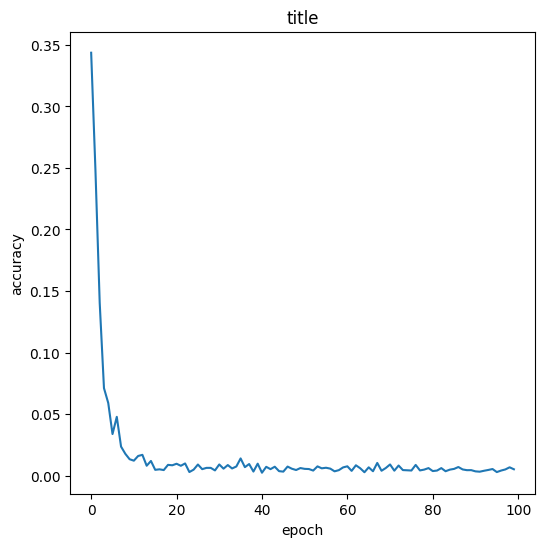

In [126]:
print_history(loss)

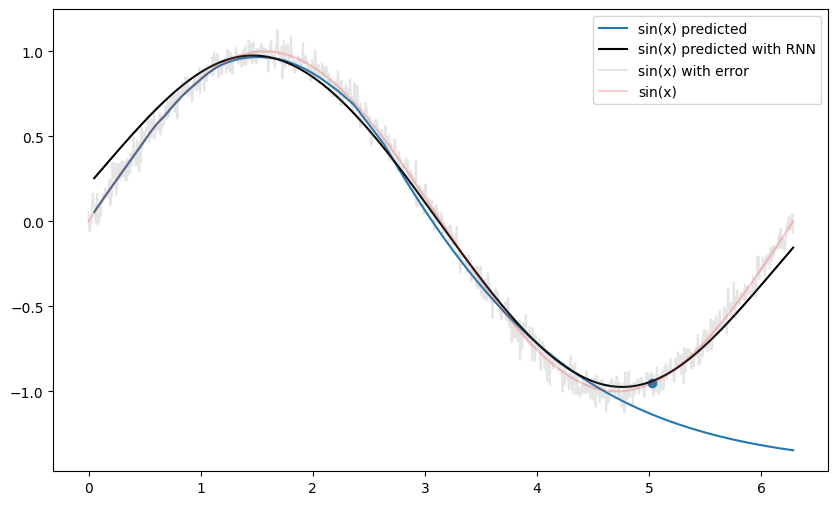

In [127]:
# Получаем входные данные и предсказания
x_, _ = test_dataset[:]
y_ = model(x_).detach().numpy()  # Переводим выход модели в numpy для графика

# Обрезаем x, чтобы он соответствовал длине y_
x_trimmed = x[n:]  # Убираем первые n элементов

# Получаем входные данные и предсказания
x_rnn, _ = test_dataset[:]
x_rnn = x_rnn.unsqueeze(-1)  # Добавляем размерность для input_size
y_rnn = model_rnn(x_rnn).detach().numpy()  # Переводим выход модели в numpy для графика

# Обрезаем x, чтобы он соответствовал длине y_
x_trimmed_rnn = x[n:]  # Убираем первые n элементов

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_trimmed, y_, label='sin(x) predicted')
plt.plot(x_trimmed_rnn, y_rnn, color='black', label='sin(x) predicted with RNN')
plt.plot(x, y_with_error, color='gray', alpha=0.2, label='sin(x) with error')
plt.plot(x, y_true, color='red', alpha=0.2, label='sin(x)')
plt.scatter(x=0.8*b, y=np.sin(0.8*b))
plt.legend()
plt.show()
